# Bước 1: Import Modules

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

# Bước 2: Load bộ dữ liệu NER

Sau khi đọc tập dữ liệu, chúng ta quan sát thử 50 dòng đầu tiên như thế nào.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/DS310_TH2/ner_dataset.csv', encoding="latin1")
data = data.fillna(method="ffill")
data.head(50)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


#Visualizing 
Thông kê bộ dữ liệu:
- Số lượng từ duy nhất trong kho ngữ liệu. (Tập từ vựng, số chiều)
- Số lượng thẻ duy nhất trong tập dữ liệu. (Tập nhãn)


Bằng cách sử dụng hàm **“nunique”.**

In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


Tạo một danh sách và sử dụng phương thức set() để lấy các giá trị trong cột “word” và loại bỏ giá trị trùng.\
Thêm phần đệm có tên “Endpad”.


In [ ]:
#tạo tập từ vựng
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)

In [ ]:
#tạo tập nhãn tương tự như trên
tags = list(set(data["Tag"].values))
n_tags = len(tags)

# Bước 3: Lấy các câu và các thẻ tương ứng

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

#Yêu cầu các bạn có thể viết theo cách khác, không dùng code sẵn

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [ ]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

# Bước 4: Ánh xạ giữa các câu và chỉ mục
Chúng ta có thể thấy rằng mỗi từ được gán cho một thẻ duy nhất. Chúng tôi có thể truy xuất những từ này bằng cách sử dụng các chỉ số của chúng và tra cứu chúng trong từ điển và trả về các khóa tương ứng.


In [ ]:
word2idx = {w: i   for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
# word2idx
word2idx["ENDPAD"]
tag2idx 

{'I-gpe': 0,
 'B-art': 1,
 'I-geo': 2,
 'B-eve': 3,
 'B-per': 4,
 'I-eve': 5,
 'O': 6,
 'I-art': 7,
 'I-org': 8,
 'B-org': 9,
 'B-nat': 10,
 'B-geo': 11,
 'I-nat': 12,
 'B-tim': 13,
 'B-gpe': 14,
 'I-per': 15,
 'I-tim': 16}

#Bước 5: Padding  đầu vào và cắt dữ liệu thành tập Train/Test\
Trong trục X, có thể thấy độ dài an toàn của câu là khoảng 50.

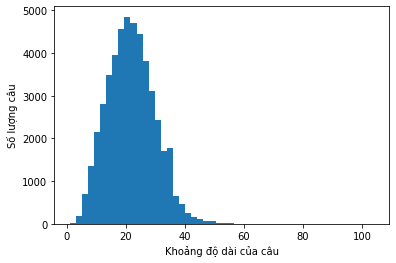

In [ ]:
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins= 50)
plt.xlabel("Khoảng độ dài của câu")
plt.ylabel("Số lượng câu")
plt.show()

- Sử dụng hàm pad_sequence() cho padding
- X sẽ là một đại diện bằng số cho các từ. (sử dụng word2idx)
- ‘Post’ chỉ là một giá trị của đối số đệm ở cuối câu.
- X,y là vector

In [ ]:
#ánh xạ từ trong câu và nhãn về index của nó
from tensorflow.keras.preprocessing.sequence import pad_sequences
#đặt max length cho phù hợp
max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

#tương tự với nhãn
y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
print(X[0])
print(y[0])

[20593 17666 25650 27476  7740 12817 14434 22393 17122 11252  7942  7217
 21630 18356   939 11252    98 17666  1871 19572  3033 25289 12308  1610
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178]
[ 6  6  6  6  6  6 11  6  6  6  6  6 11  6  6  6  6  6 14  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6]


- test_size = 0.2 có nghĩa là 80% dữ liệu chia cho tập huấn luyện và 20% còn lại cho tập kiểm tra.

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

# Bước 6: Xây dựng Mô hình LSTM hai chiều (bi-LSTM)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

Bản tóm tắt cho thấy rằng chúng ta có hơn 1,8 triệu tham số cần được huấn luyện.

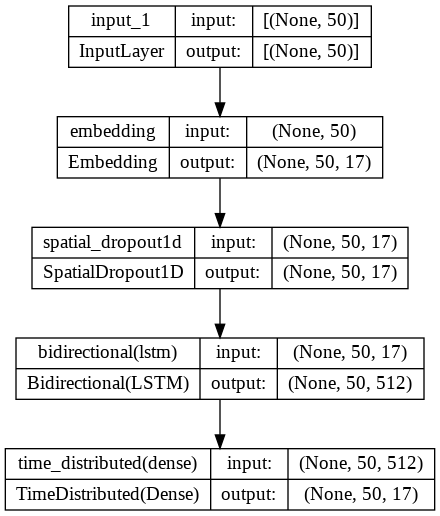

In [ ]:
model = Sequential() #Yêu cầu khỏi tạo mạng LSTM 1 chiều

#Input
model.add(Input(shape=(max_len,)))
#Embedding
model.add(Embedding(input_dim = num_words, output_dim = n_tags, ))
#SpatialDropout1D
model.add(SpatialDropout1D(0.2))
#LSTM
model.add(Bidirectional(LSTM(units=256, return_sequences=True, recurrent_dropout=0.2, dropout=0.2)))
#TimeDistributed
model.add(TimeDistributed(Dense(n_tags, activation="softmax")))
# model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

- Sử dụng trình tối ưu hoá "adam"
- sparce_categorical_crossentropy làm hàm mất mát
- Ma trận mà chúng ta sẽ quan tâm là ma trận độ chính xác.

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#Bước7: Huấn luyện Model

- Để bắt đầu huấn luyện là gọi model.fit ()
- Có thể tăng kích thước batch_size nếu bạn có GPU có kích thước bộ nhớ lớn.



In [ ]:
# Các bạn nhớ là phải lưu mô hình khi train (có nhắc lại yêu cầu ở cuối) 
import time
start_time = time.time()

history = model.fit(
    x=x_train,
    y=y_train,
    # validation_data=(x_valid,y_valid),
    validation_split= 0.1,
    batch_size= 32, 
    epochs=1,
    verbose=1
)
print("[{}] Completed!".format(time.time() - start_time))

1080/1080 [==============================] - 567s 521ms/step - loss: 0.2161 - accuracy: 0.9478 - val_loss: 0.1095 - val_accuracy: 0.9688
[567.4740259647369] Completed!


# Bước8: Đánh giá mô hình NER



In [ ]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 33s 111ms/step - loss: 0.1130 - accuracy: 0.9679


[0.11297140270471573, 0.967873215675354]

- Dự đoán

In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("ENDPAD", "O"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("ENDPAD", "O"))
        out.append(out_i)
    return out

Tính confusion matrix bằng cách cộng dồn confusion matrix của từng mẫu

In [ ]:
from IPython.display import clear_output

idx2tag = {i: w for w, i in tag2idx.items()}
#Dự đoán và chuyển sang label
test_pred = model.predict(np.array(x_test))
pred_labels = pred2label(test_pred)
test_labels = test2label(y_test)

#Tính confusion matrix bằng cách cộng dồn confusion matrix của từng mẫu
sorted_tags = sorted(tags,key=lambda name: (name[1:], name[0]))
cfs_matrix = np.zeros((len(sorted_tags), len(sorted_tags)))
from sklearn.metrics import confusion_matrix

test_len = len(test_labels)
for i in range(len(test_labels)):
  print((i/test_len)*100,"%")
  clear_output(wait=True)
  cfs_matrix = np.add(confusion_matrix(np.array(test_labels)[i], np.array(pred_labels)[i], labels = sorted_tags), cfs_matrix)

99.98957464553794 %


Sau đó tính các metrics dựa vào confusion matrix

In [ ]:
#Tính các metrics
import math
cols_cfs_matrix = cfs_matrix.T
sum_cfs_matrix = np.sum(cfs_matrix)
f1_scores = 0

for i in range(len(sorted_tags)):
  true_positive = cfs_matrix[i][i]
  false_positive = np.sum(cols_cfs_matrix[i]) - true_positive
  false_negative = np.sum(cfs_matrix[i]) - true_positive
  true_negative = sum_cfs_matrix - true_positive - false_negative - false_positive
  precision = true_positive / (true_positive + false_positive)
  recall = true_positive / (true_positive + false_negative)  
  f1 = 2 * (precision * recall) / (precision + recall)
  if(math.isnan(f1)):
    f1 = 0
  f1_scores += f1
  print(sorted_tags[i])
  print("     True Positive = {}, False Positive = {} , True Negative = {}, False Negative = {}".format(true_positive, false_positive, true_negative, false_negative))
  print("     Precision: {}, Recall: {}, F1-score: {}".format(precision, recall, f1))
  print("")
print("F1-macro: {}".format(f1_scores / len(sorted_tags)))

O
     True Positive = 446105.0, False Positive = 5754.0 , True Negative = 26960.0, False Negative = 781.0
     Precision: 0.9872659391535855, Recall: 0.9982523507113671, F1-score: 0.9927287495340724

B-art
     True Positive = 0.0, False Positive = 0.0 , True Negative = 479518.0, False Negative = 82.0
     Precision: nan, Recall: 0.0, F1-score: 0

I-art
     True Positive = 0.0, False Positive = 0.0 , True Negative = 479530.0, False Negative = 70.0
     Precision: nan, Recall: 0.0, F1-score: 0

B-eve
     True Positive = 0.0, False Positive = 0.0 , True Negative = 479539.0, False Negative = 61.0
     Precision: nan, Recall: 0.0, F1-score: 0

I-eve
     True Positive = 0.0, False Positive = 0.0 , True Negative = 479548.0, False Negative = 52.0
     Precision: nan, Recall: 0.0, F1-score: 0

B-geo
     True Positive = 6056.0, False Positive = 2631.0 , True Negative = 469438.0, False Negative = 1475.0
     Precision: 0.6971336479797399, Recall: 0.8041428761120701, F1-score: 0.746824515969

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


# Bước 9: lưu model

Các bạn lưu lại model đã lưu và bộ trong số model

In [ ]:
import pickle
# model.save("/content/drive/MyDrive/Dataset/DS310_TH2/model_bai1.h5")
model.save_weights("/content/drive/MyDrive/Dataset/DS310_TH2/weight_bai1.h5")
pickle.dump(model, open('/content/drive/MyDrive/Dataset/DS310_TH2/model_bai1.pkl', 'wb'))

In [ ]:
# import keras
# model = keras.models.load_model('/content/drive/MyDrive/Dataset/DS310_TH2/model_bai1.h5') 
# model.load_weights("/content/drive/MyDrive/Dataset/DS310_TH2/weight_bai1.h5")
pickled_model = pickle.load(open('/content/drive/MyDrive/Dataset/DS310_TH2/model_bai1.pkl', 'rb'))

In [ ]:
pickled_model.evaluate(x_test, y_test)

300/300 [==============================] - 31s 102ms/step - loss: 0.1130 - accuracy: 0.9679


[0.11297140270471573, 0.967873215675354]